In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")



/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# Spread (between buy-sell) on all events has COMPLETELY disappeared --> this signal is less informative than the one at 1-3 year ahead

# Many spreads are close to 0 or even negative


In [2]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl')
data.columns.values

array(['tradedate', 'osid', 'symbol', 'coname', 'sector_group', 'max_dt',
       'previoustradedate', 'tickssinceipo', 'alpha', 'stdev_alpha',
       'pricehigh', 'pricelow', 'priceclose', 'priceopen', 'splitfactor',
       'cumsplitfactor', 'volume', 'unadjustedpriceclose', 'pricepctchgd',
       'avgvol50d', 'avgdollarvol50d', 'growthscore', 'growthrank',
       'lastupdatetime', 'epsq1', 'epsq2', 'epsq3', 'epsq4', 'epsq5',
       'epsq6', 'epsq7', 'epsq8', 'epshighq1', 'epshighq2', 'epshighq3',
       'epshighq4', 'epshighq5', 'epshighq6', 'epshighq7', 'epshighq8',
       'epslowq1', 'epslowq2', 'epslowq3', 'epslowq4', 'epslowq5',
       'epslowq6', 'epslowq7', 'epslowq8', 'salesq1', 'salesq2',
       'salesq3', 'salesq4', 'salesq5', 'salesq6', 'salesq7', 'salesq8',
       'saleshighq1', 'saleshighq2', 'saleshighq3', 'saleshighq4',
       'saleshighq5', 'saleshighq6', 'saleshighq7', 'saleshighq8',
       'saleslowq1', 'saleslowq2', 'saleslowq3', 'saleslowq4',
       'saleslowq5', 's

# Analyst Estimate = epshigha1

### Now, let's trade on increases in epshigha1 targets
### the times when 'epshigha1' changes
###### Buy when positive change, so when df['epshigha1'].diff(1) > 0
###### Sell when negative change, so when df['epshigha1'].diff(1) < 0
### with 1 day, 1 week, 2 weeks, 3 weeks, and 4 weeks holding period 
### (AHEAD, not backward... so our ret, ret5d, 10d, 15d, and 20d needs to be forward)
### Thus, we will use ret5d_'lag' !!

# Set buy_tomorrow>0 when df['epshigha1'].diff(1) > 0
# Set Sell_tomorrow>0 when df['epshigha1'].diff(1) < 0


In [3]:
data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epshigha4'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epshigha4'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epshigha4'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'


Total number of Buys:  8722
Total number of Sells:  7815
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]


In [4]:
data = cp.trade_on_valid_lags_only(data)


There are  59  problems for buying

There are  61  problems for selling
Total number of Buys:  8663
Total number of Sells:  7754


# Now we can trade!
### Holding period of 1 week, 2 weeks, 3 weeks, and 4 weeks with equal weighted portfolios!

# First, create daily equal weighted portfolio weights and returns (NOT AT THE WEEKLY frequency because that will mess up the implementation of the portfolio!). Problem is:

##### Think (part 1): 1st signal on Monday- want to buy on Tuesday and hold for 1 week in an equal weighted portfolio
##### Think (part 2): 2nd signal on Thursday- want to buy on Friday and hold for 1 week in an equal weighted portfolio
##### Think (part 3): Will have overlapping portfolio between 1st and 2nd signal on Friday and on Monday

## Then, for 1 week, 2 week, 3 week, and 4 week holding periods, we must do the following:
##### extend "buy_tomorrow" and "sell_tomorrow" forward for 4 more trading days

In [5]:
data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)


There are  148  problems for buying

There are  138  problems for selling
Total number of Buys:  91189
Total number of Sells:  75385

There are  135  problems for buying

There are  122  problems for selling
Total number of Buys:  72433
Total number of Sells:  60127

There are  102  problems for buying

There are  96  problems for selling
Total number of Buys:  52330
Total number of Sells:  43888

There are  69  problems for buying

There are  67  problems for selling
Total number of Buys:  30700
Total number of Sells:  26234

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  8655
Total number of Sells:  7750


# First, do 1 day holding period: data_smaller
# Next, do 5 day holding period: data_smaller5
# Next, do 10 day holding period: data_smaller10
# Next, do 15 day holding period: data_smaller15
# Next, do 20 day holding period: data_smaller20



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.892
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0785
Time:                        20:28:09   Log-Likelihood:                 5559.7
No. Observations:                2573   AIC:                        -1.111e+04
Df Residuals:                    2566   BIC: 

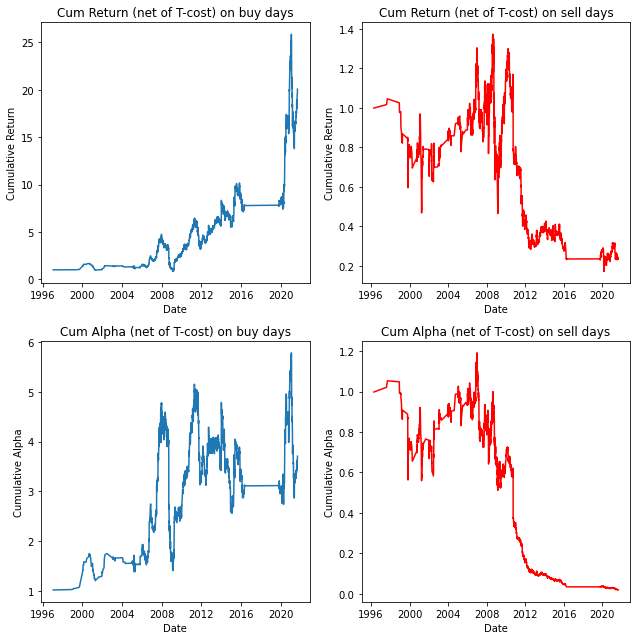

In [6]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.389
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00246
Time:                        20:28:23   Log-Likelihood:                 8312.5
No. Observations:                3470   AIC:                        -1.661e+04
Df Residuals:                    3463   BIC: 

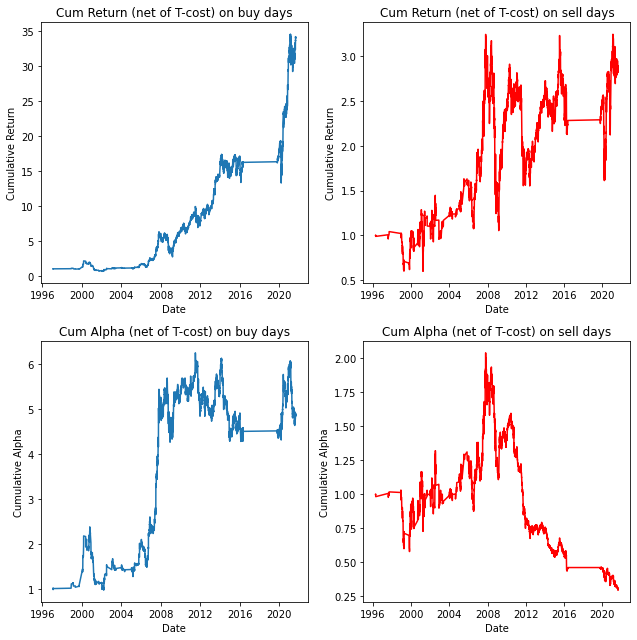

In [7]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.970
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000579
Time:                        20:28:38   Log-Likelihood:                 8951.4
No. Observations:                3705   AIC:                        -1.789e+04
Df Residuals:                    3698   BIC: 

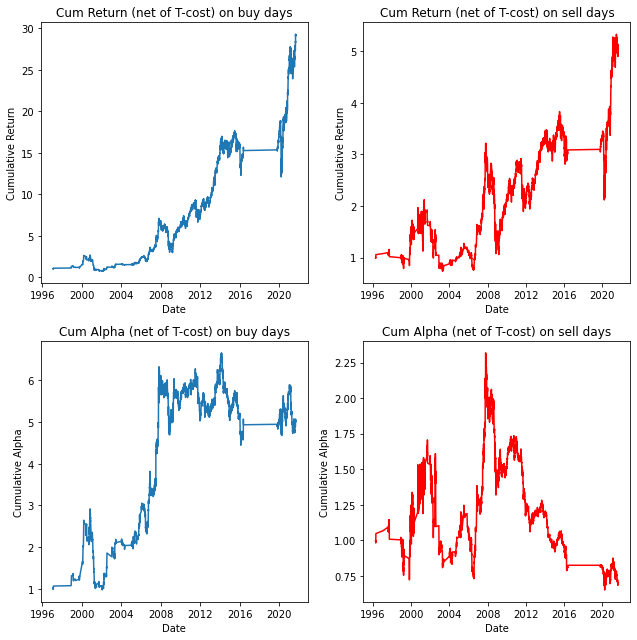

In [8]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.370
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000209
Time:                        20:28:53   Log-Likelihood:                 9177.7
No. Observations:                3857   AIC:                        -1.834e+04
Df Residuals:                    3850   BIC: 

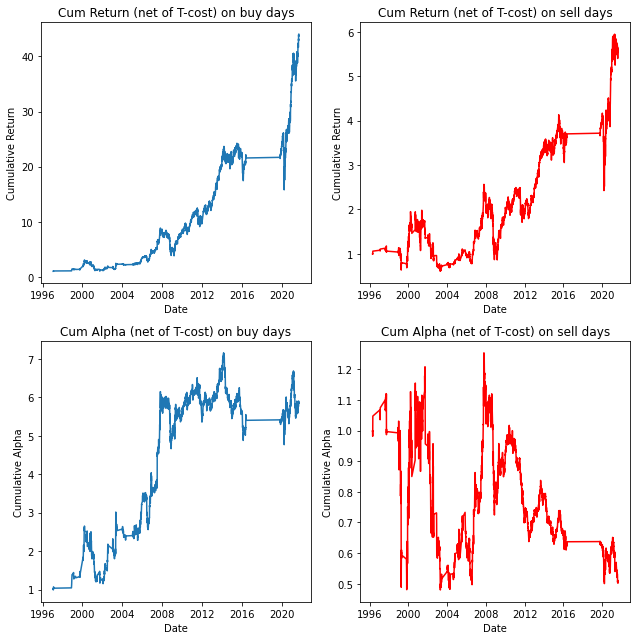

In [9]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.366
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00260
Time:                        20:29:11   Log-Likelihood:                 9449.0
No. Observations:                3966   AIC:                        -1.888e+04
Df Residuals:                    3959   BIC: 

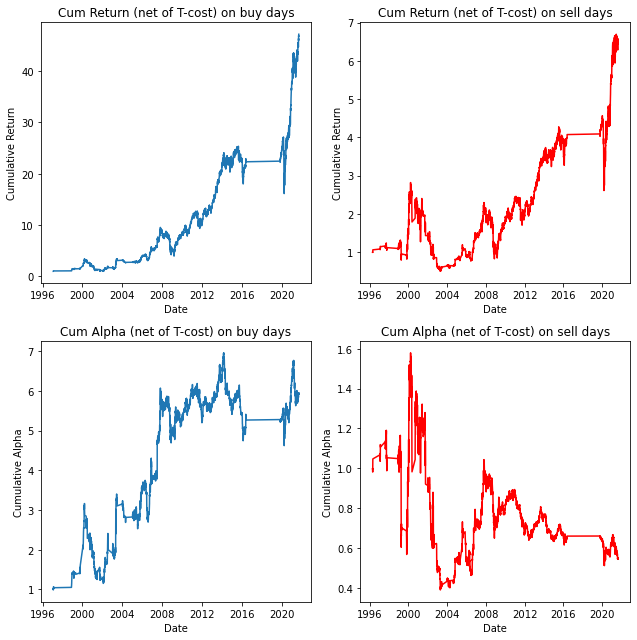

In [10]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using the epslowa1 estimate!

In [11]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa4'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epslowa4'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epslowa4'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  8520
Total number of Sells:  7951
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  50  problems for buying

There are  69  problems for selling
Total number of Buys:  8470
Total number of Sells:  7882

There are  141  problems for buying

There are  140  problems for selling
Total number of Buys:  88847
Total number of Sells:  76763

There are  127  problems for buying

There are  126  problems for selling
Total number of Buys:  70429
Total number of Sells:  61305

There are  99  problems for buying

There are  96  problems for selling
Total number of Buys:  50901
Total number of Sells:  44827

There are  72  problems for buying

There are  67  problems for selling
Total number of Buys:  29904
Total number of Sells:  26798

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  8464
Total number of Sells:  7877



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.935
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000639
Time:                        20:30:10   Log-Likelihood:                 5603.3
No. Observations:                2582   AIC:                        -1.119e+04
Df Residuals:                    2575   BIC: 

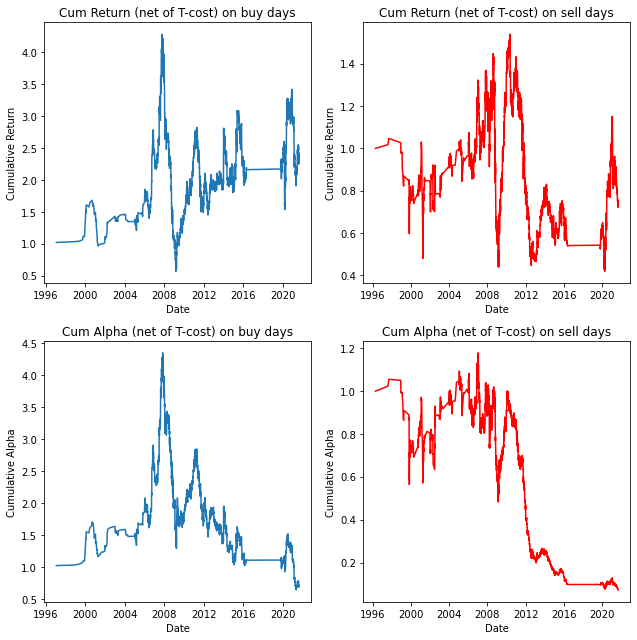

In [12]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.655
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00128
Time:                        20:30:23   Log-Likelihood:                 8323.6
No. Observations:                3476   AIC:                        -1.663e+04
Df Residuals:                    3469   BIC: 

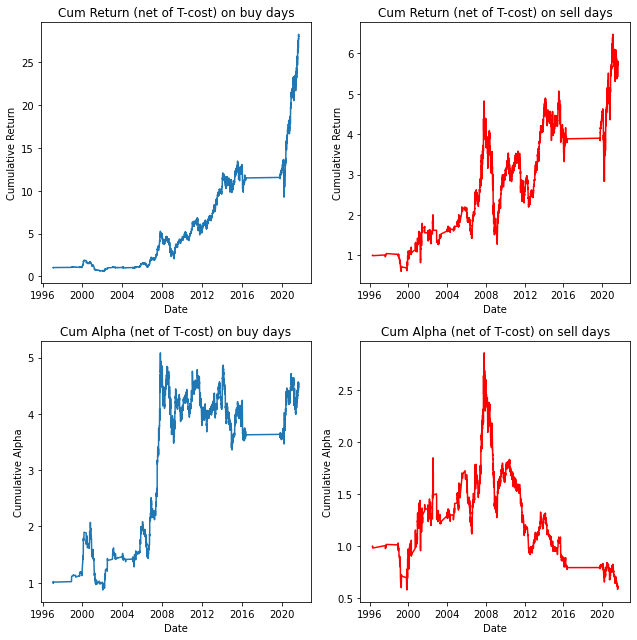

In [13]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.488
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.15e-05
Time:                        20:30:38   Log-Likelihood:                 8917.5
No. Observations:                3713   AIC:                        -1.782e+04
Df Residuals:                    3706   BIC: 

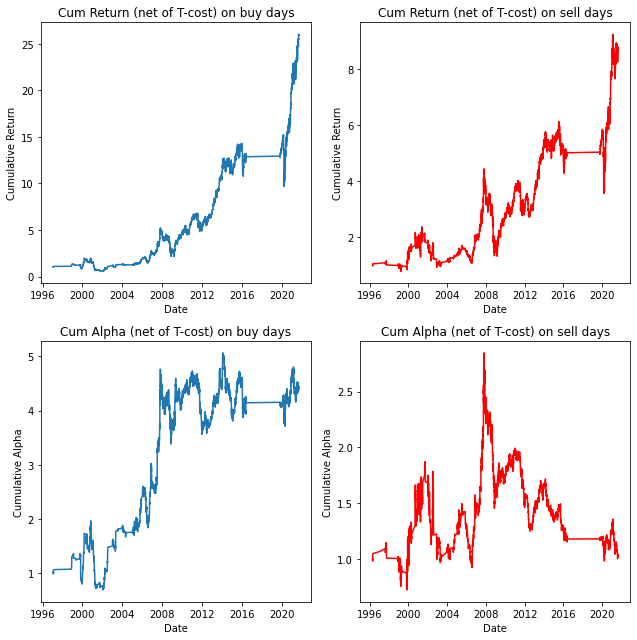

In [14]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.442
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.29e-05
Time:                        20:30:52   Log-Likelihood:                 9263.3
No. Observations:                3861   AIC:                        -1.851e+04
Df Residuals:                    3854   BIC: 

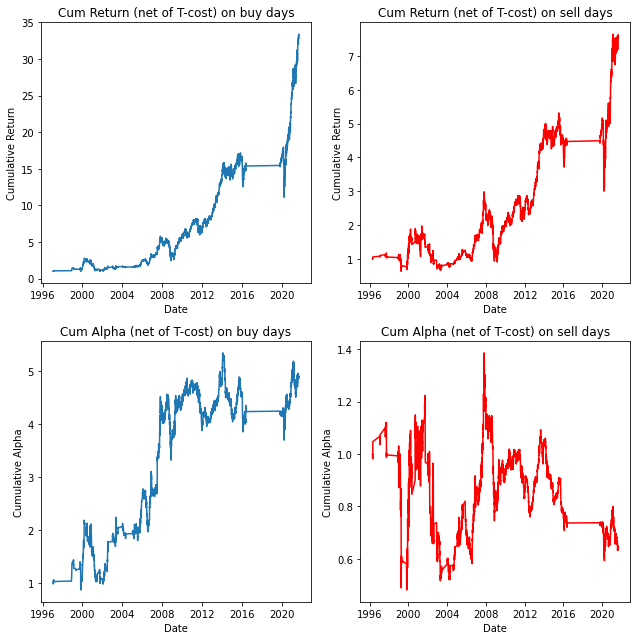

In [15]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.599
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00146
Time:                        20:31:08   Log-Likelihood:                 9554.8
No. Observations:                3974   AIC:                        -1.910e+04
Df Residuals:                    3967   BIC: 

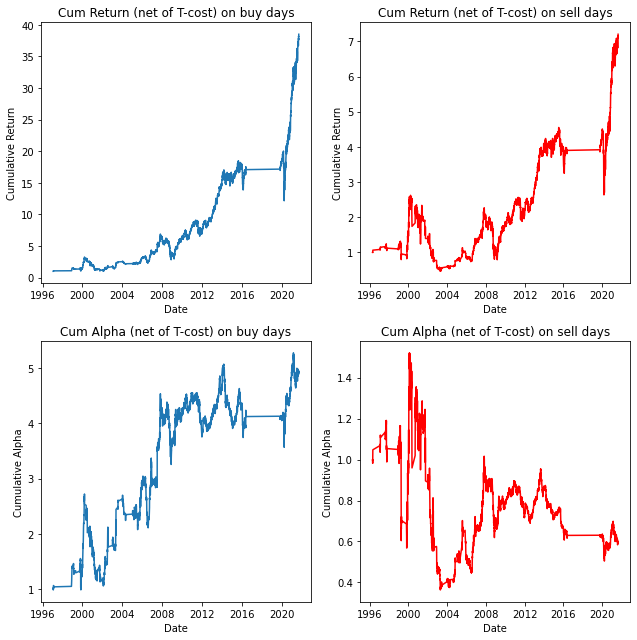

In [16]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using BOTH epshigha1 & epslowa1 estimate!

In [17]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa4'].notna()].reset_index(drop=True).copy()
data = data[data['epshigha4'].notna()].reset_index(drop=True).copy()

data['midpoint_eps_estimate'] = (data['epslowa4'] + data['epshigha4']) / 2

data = data[data['midpoint_eps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  9913
Total number of Sells:  9164
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  61  problems for buying

There are  71  problems for selling
Total number of Buys:  9852
Total number of Sells:  9093

There are  165  problems for buying

There are  163  problems for selling
Total number of Buys:  105072
Total number of Sells:  91519

There are  148  problems for buying

There are  146  problems for selling
Total number of Buys:  84161
Total number of Sells:  73667

There are  112  problems for buying

There are  115  problems for selling
Total number of Buys:  61250
Total number of Sells:  54046

There are  76  problems for buying

There are  81  problems for selling
Total number of Buys:  35824
Total number of Sells:  32034

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  9845
Total number of Sells:  9088



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.295
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00312
Time:                        20:32:16   Log-Likelihood:                 5855.3
No. Observations:                2695   AIC:                        -1.170e+04
Df Residuals:                    2688   BIC: 

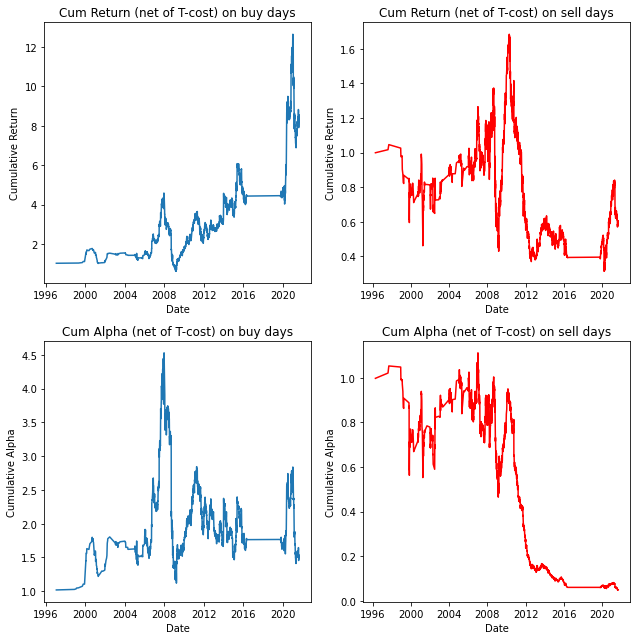

In [18]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.520
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00178
Time:                        20:32:30   Log-Likelihood:                 8409.0
No. Observations:                3497   AIC:                        -1.680e+04
Df Residuals:                    3490   BIC: 

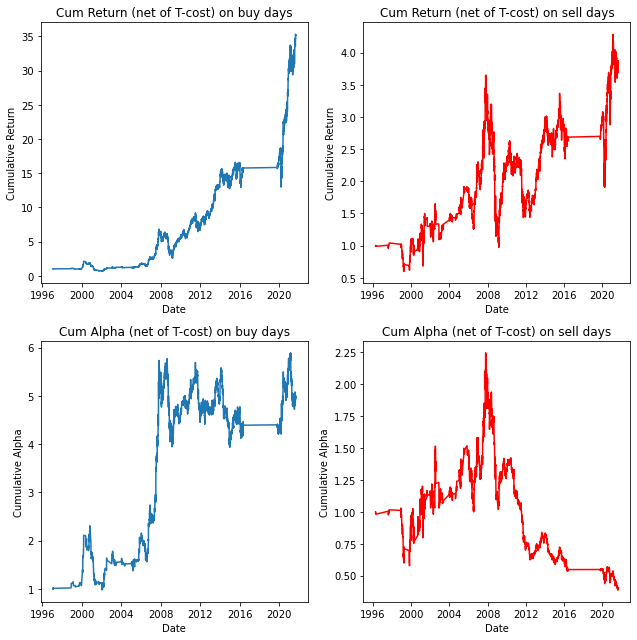

In [19]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.104
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.14e-05
Time:                        20:32:44   Log-Likelihood:                 9017.8
No. Observations:                3744   AIC:                        -1.802e+04
Df Residuals:                    3737   BIC: 

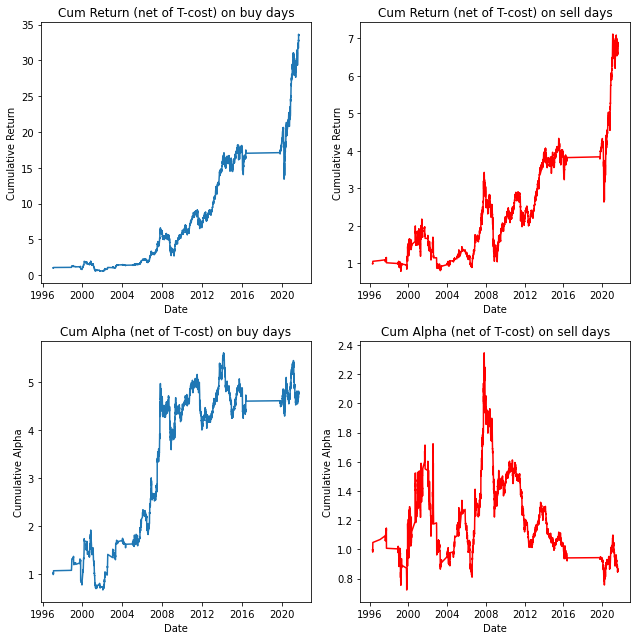

In [20]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.738
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           8.11e-05
Time:                        20:32:59   Log-Likelihood:                 9350.8
No. Observations:                3902   AIC:                        -1.869e+04
Df Residuals:                    3895   BIC: 

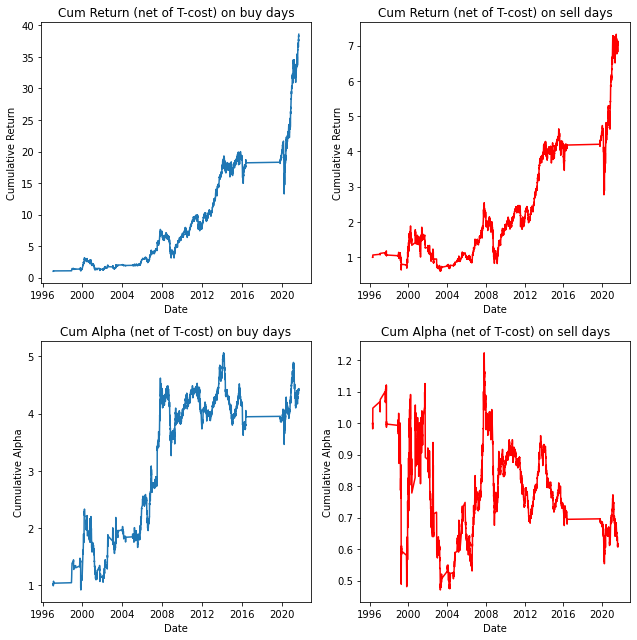

In [21]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.798
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000890
Time:                        20:33:16   Log-Likelihood:                 9667.7
No. Observations:                4020   AIC:                        -1.932e+04
Df Residuals:                    4013   BIC: 

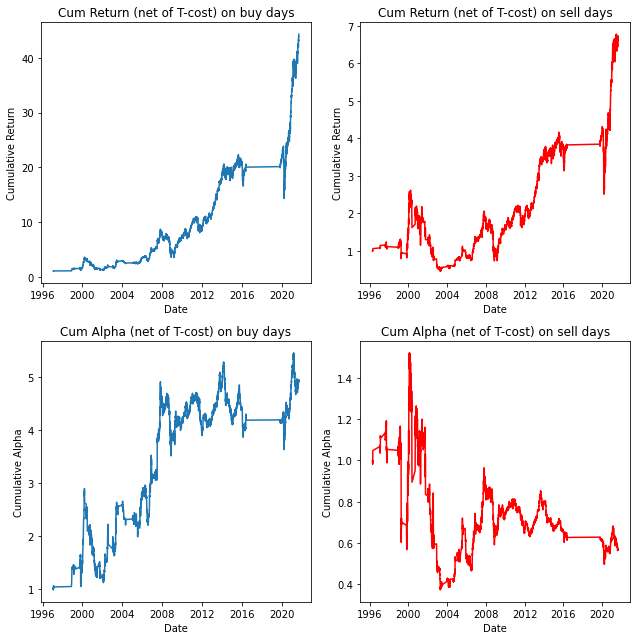

In [22]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleshigha1

In [23]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleshigha4'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleshigha4'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleshigha4'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  9543
Total number of Sells:  8357
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  75  problems for buying

There are  54  problems for selling
Total number of Buys:  9468
Total number of Sells:  8303

There are  158  problems for buying

There are  127  problems for selling
Total number of Buys:  98903
Total number of Sells:  78485

There are  142  problems for buying

There are  110  problems for selling
Total number of Buys:  78776
Total number of Sells:  62635

There are  110  problems for buying

There are  86  problems for selling
Total number of Buys:  57080
Total number of Sells:  45825

There are  78  problems for buying

There are  64  problems for selling
Total number of Buys:  33526
Total number of Sells:  27573

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  9460
Total number of Sells:  8299



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.171
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.319
Time:                        20:34:11   Log-Likelihood:                 5814.2
No. Observations:                2643   AIC:                        -1.161e+04
Df Residuals:                    2636   BIC: 

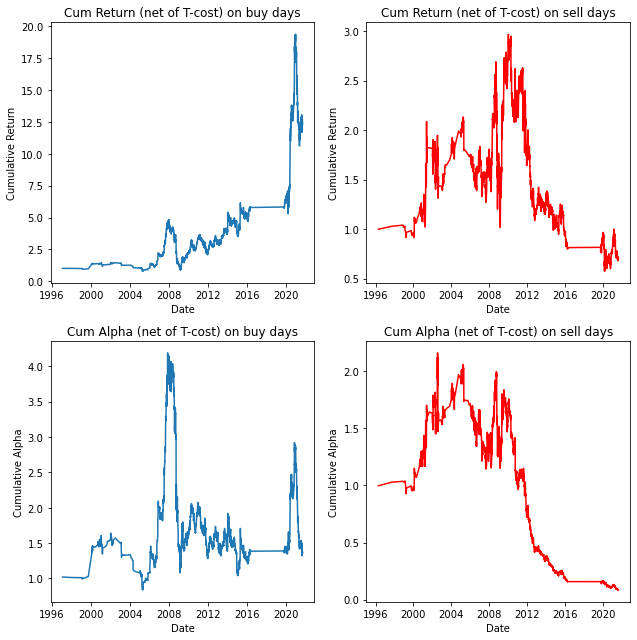

In [24]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.862
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00877
Time:                        20:34:27   Log-Likelihood:                 8442.5
No. Observations:                3527   AIC:                        -1.687e+04
Df Residuals:                    3520   BIC: 

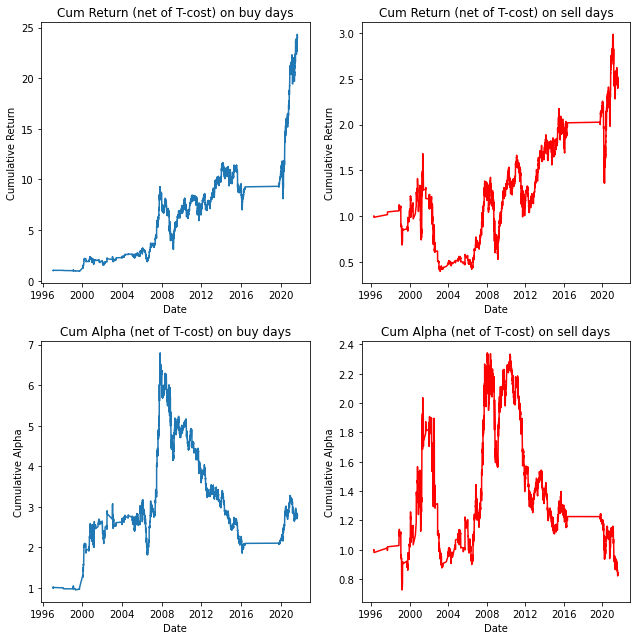

In [25]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.151
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00439
Time:                        20:34:44   Log-Likelihood:                 9082.7
No. Observations:                3746   AIC:                        -1.815e+04
Df Residuals:                    3739   BIC: 

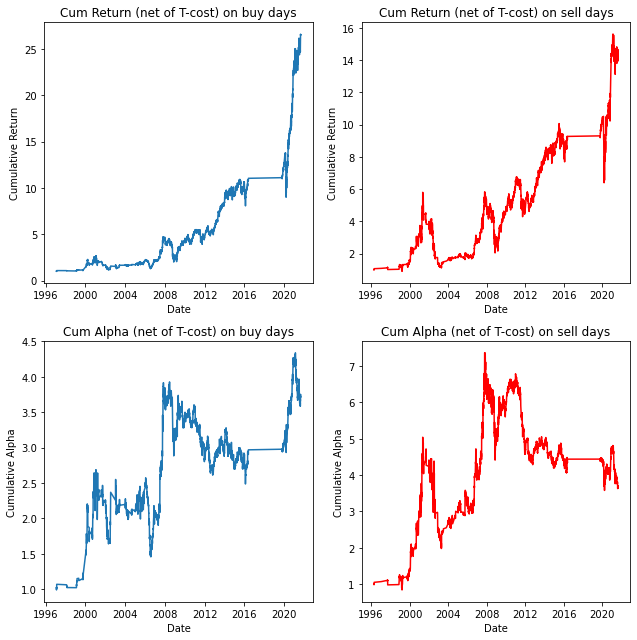

In [26]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.427
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000181
Time:                        20:35:00   Log-Likelihood:                 9445.1
No. Observations:                3892   AIC:                        -1.888e+04
Df Residuals:                    3885   BIC: 

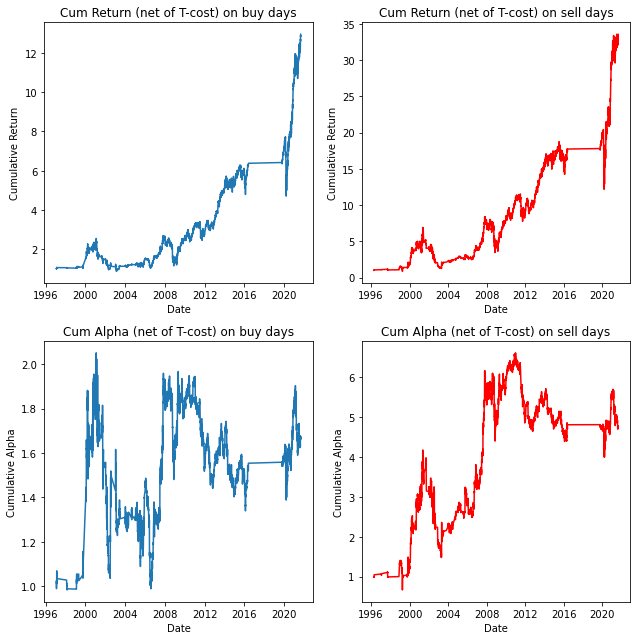

In [27]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.566
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00159
Time:                        20:35:16   Log-Likelihood:                 9766.5
No. Observations:                4008   AIC:                        -1.952e+04
Df Residuals:                    4001   BIC: 

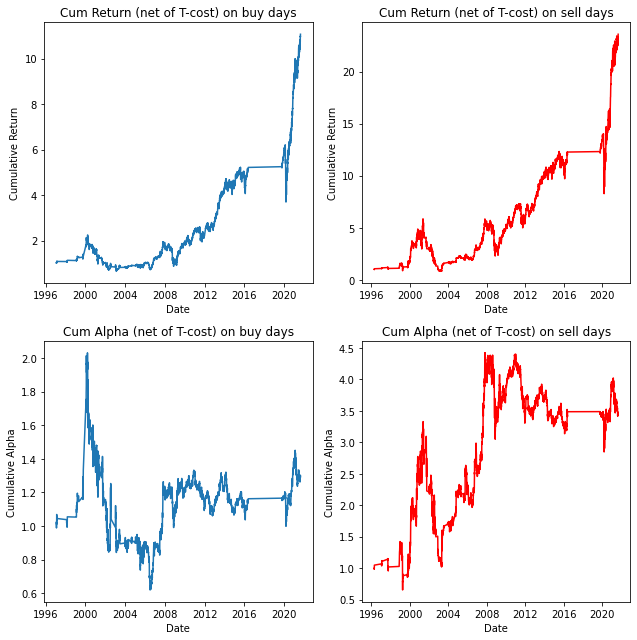

In [28]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleslowa1

In [29]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa4'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleslowa4'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleslowa4'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  9453
Total number of Sells:  8452
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  63  problems for buying

There are  58  problems for selling
Total number of Buys:  9390
Total number of Sells:  8394

There are  147  problems for buying

There are  123  problems for selling
Total number of Buys:  98789
Total number of Sells:  79263

There are  134  problems for buying

There are  107  problems for selling
Total number of Buys:  78414
Total number of Sells:  63335

There are  98  problems for buying

There are  84  problems for selling
Total number of Buys:  56739
Total number of Sells:  46327

There are  68  problems for buying

There are  60  problems for selling
Total number of Buys:  33312
Total number of Sells:  27880

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  9383
Total number of Sells:  8391



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.969
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0666
Time:                        20:36:10   Log-Likelihood:                 5759.9
No. Observations:                2619   AIC:                        -1.151e+04
Df Residuals:                    2612   BIC: 

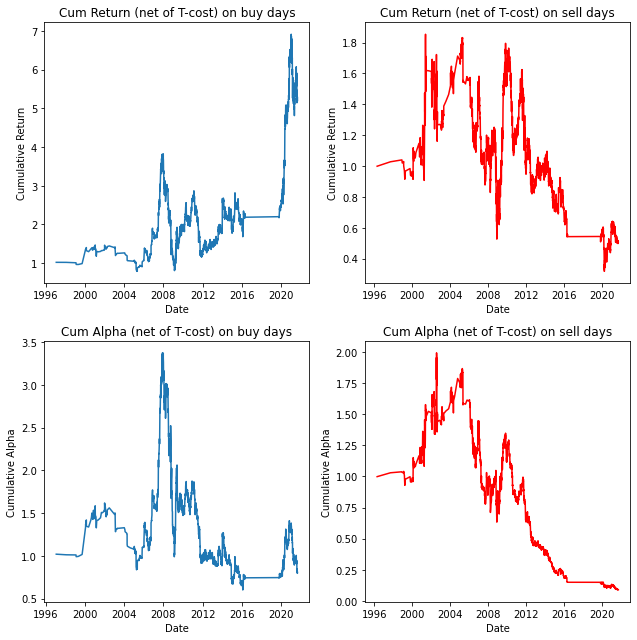

In [30]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.222
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000306
Time:                        20:36:27   Log-Likelihood:                 8347.9
No. Observations:                3496   AIC:                        -1.668e+04
Df Residuals:                    3489   BIC: 

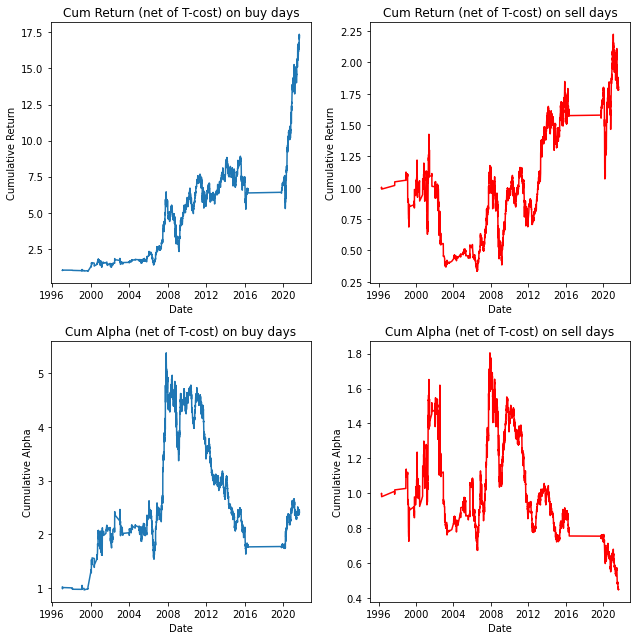

In [31]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.765
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000969
Time:                        20:36:48   Log-Likelihood:                 8996.7
No. Observations:                3724   AIC:                        -1.798e+04
Df Residuals:                    3717   BIC: 

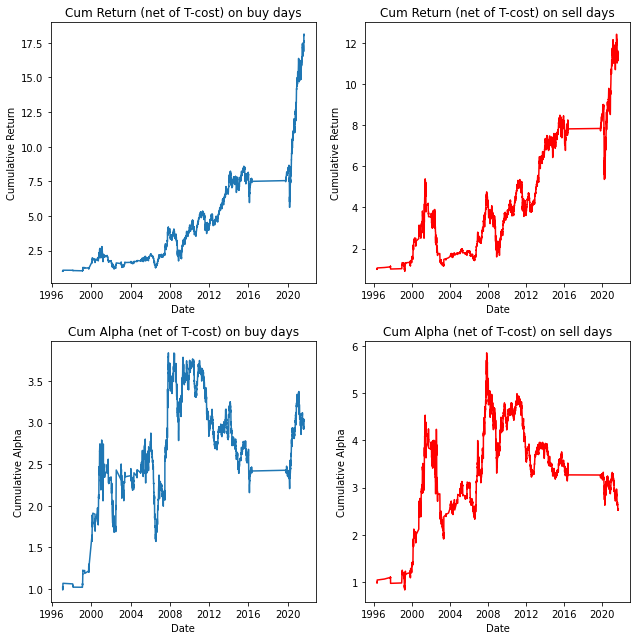

In [32]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.808
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           6.77e-05
Time:                        20:37:03   Log-Likelihood:                 9369.8
No. Observations:                3870   AIC:                        -1.873e+04
Df Residuals:                    3863   BIC: 

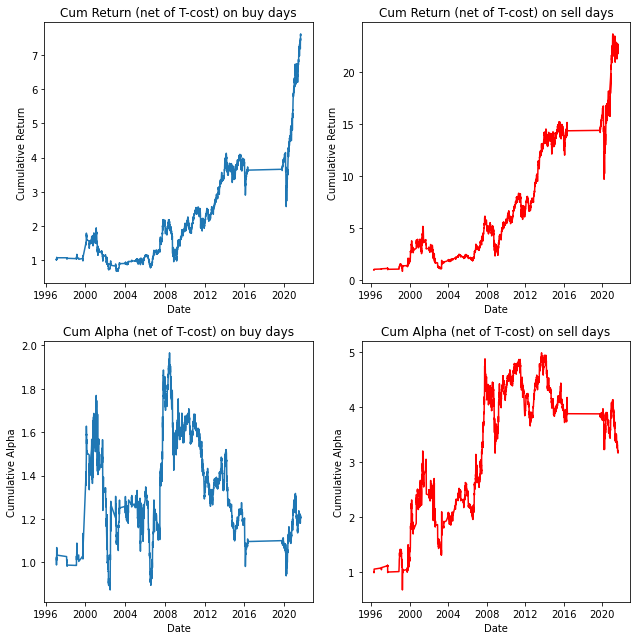

In [33]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.497
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00188
Time:                        20:37:19   Log-Likelihood:                 9704.3
No. Observations:                3990   AIC:                        -1.939e+04
Df Residuals:                    3983   BIC: 

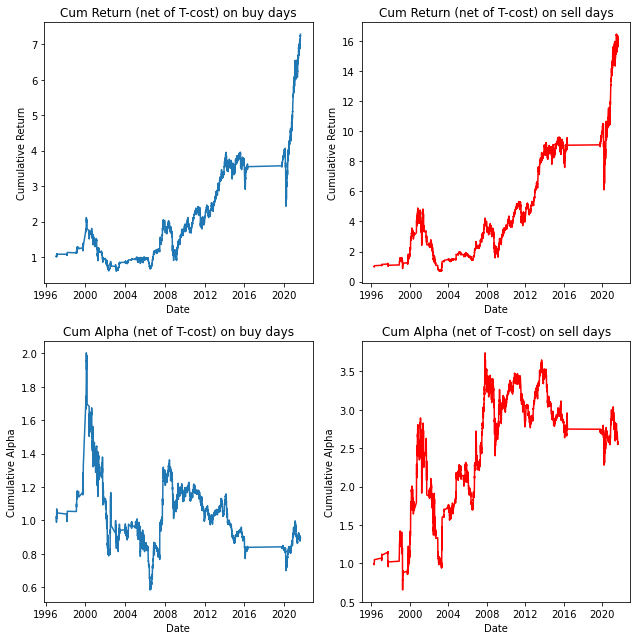

In [34]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH saleshigha1 & saleslowa1

In [35]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa4'].notna()].reset_index(drop=True).copy()
data = data[data['saleshigha4'].notna()].reset_index(drop=True).copy()

data['midpoint_sales_estimate'] = (data['saleslowa4'] + data['saleshigha4']) / 2

data = data[data['midpoint_sales_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  11053
Total number of Sells:  9804
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  74  problems for buying

There are  64  problems for selling
Total number of Buys:  10979
Total number of Sells:  9740

There are  178  problems for buying

There are  149  problems for selling
Total number of Buys:  116265
Total number of Sells:  96332

There are  161  problems for buying

There are  130  problems for selling
Total number of Buys:  93503
Total number of Sells:  77596

There are  123  problems for buying

There are  103  problems for selling
Total number of Buys:  68240
Total number of Sells:  56996

There are  84  problems for buying

There are  75  problems for selling
Total number of Buys:  39998
Total number of Sells:  33899

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  10971
Total number of Sells:  9736



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.523
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.166
Time:                        20:38:09   Log-Likelihood:                 6083.5
No. Observations:                2755   AIC:                        -1.215e+04
Df Residuals:                    2748   BIC: 

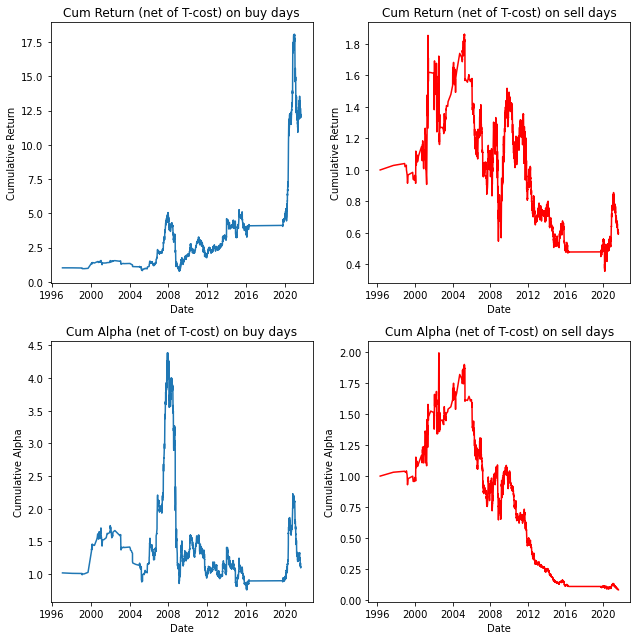

In [36]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.452
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00211
Time:                        20:38:23   Log-Likelihood:                 8502.2
No. Observations:                3544   AIC:                        -1.699e+04
Df Residuals:                    3537   BIC: 

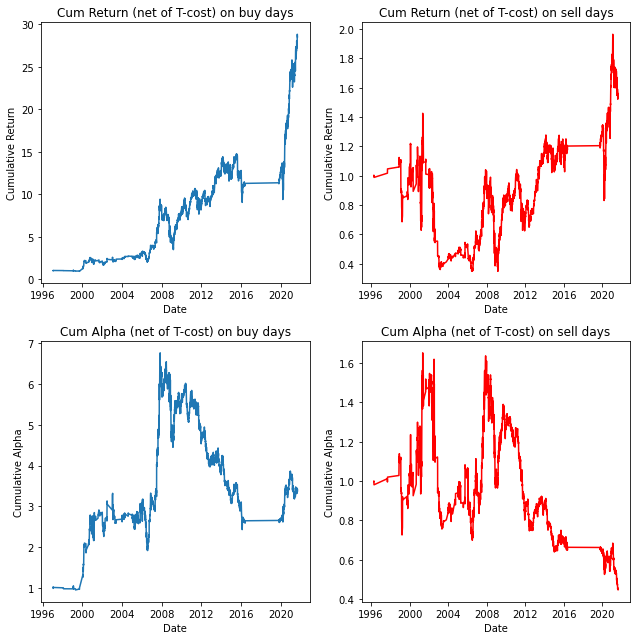

In [37]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.060
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00547
Time:                        20:38:40   Log-Likelihood:                 9135.0
No. Observations:                3766   AIC:                        -1.826e+04
Df Residuals:                    3759   BIC: 

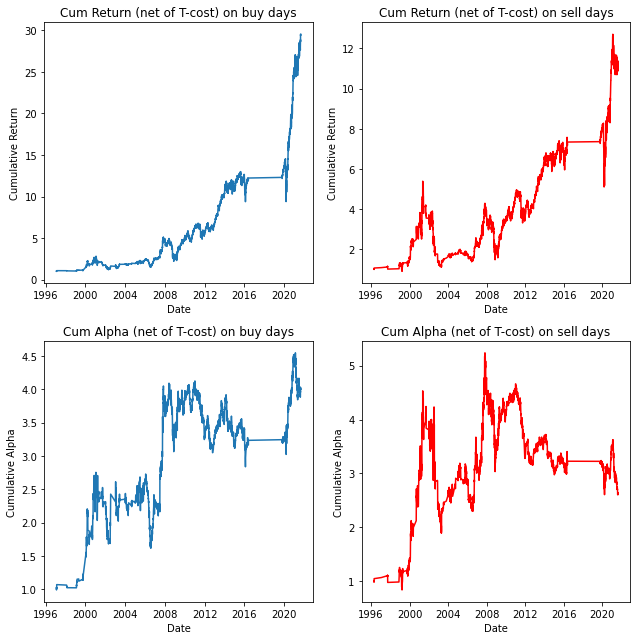

In [38]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.103
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000413
Time:                        20:38:57   Log-Likelihood:                 9513.8
No. Observations:                3920   AIC:                        -1.901e+04
Df Residuals:                    3913   BIC: 

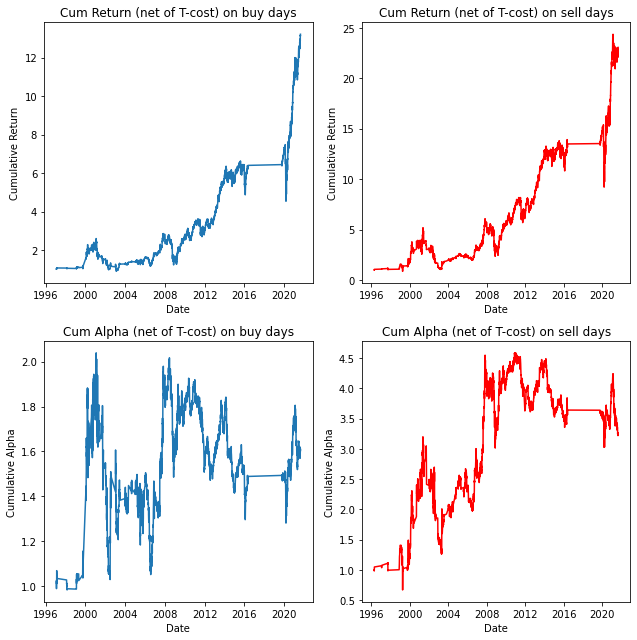

In [39]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.057
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00551
Time:                        20:39:16   Log-Likelihood:                 9840.2
No. Observations:                4038   AIC:                        -1.967e+04
Df Residuals:                    4031   BIC: 

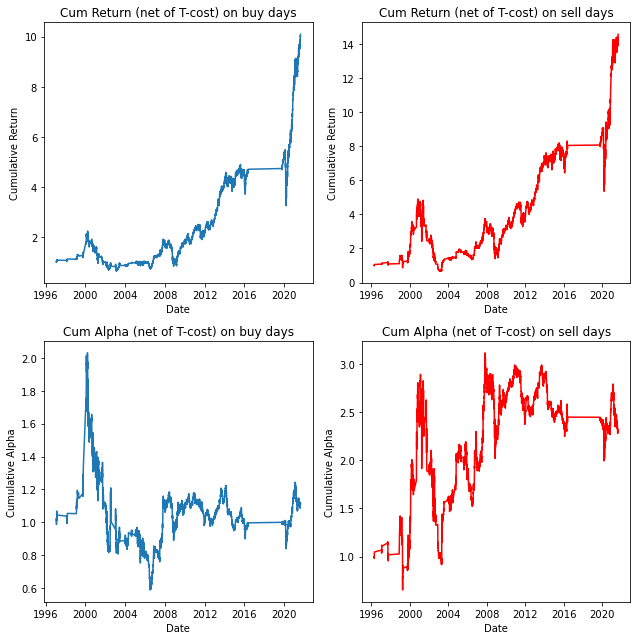

In [40]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpshigha1

In [41]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha4'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpshigha4'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpshigha4'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  3965
Total number of Sells:  3645
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  30  problems for buying

There are  24  problems for selling
Total number of Buys:  3935
Total number of Sells:  3621

There are  67  problems for buying

There are  64  problems for selling
Total number of Buys:  32726
Total number of Sells:  27932

There are  63  problems for buying

There are  59  problems for selling
Total number of Buys:  26440
Total number of Sells:  22678

There are  52  problems for buying

There are  47  problems for selling
Total number of Buys:  19709
Total number of Sells:  17128

There are  40  problems for buying

There are  36  problems for selling
Total number of Buys:  12359
Total number of Sells:  10965

There are  0  problems for buying

There are  0  problems for selling
Total number of Buys:  3933
Total number of Sells:  3620



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.983
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00667
Time:                        20:40:03   Log-Likelihood:                 3981.2
No. Observations:                1780   AIC:                            -7948.
Df Residuals:                    1773   BIC: 

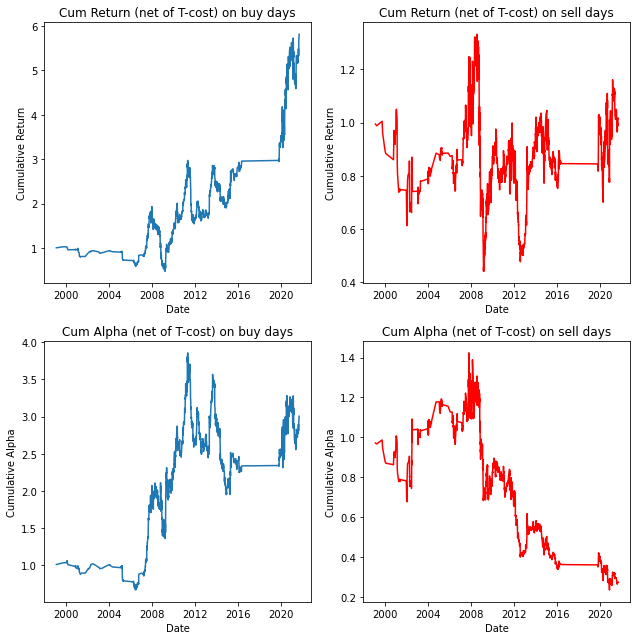

In [42]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.156
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00435
Time:                        20:40:16   Log-Likelihood:                 7049.1
No. Observations:                2993   AIC:                        -1.408e+04
Df Residuals:                    2986   BIC: 

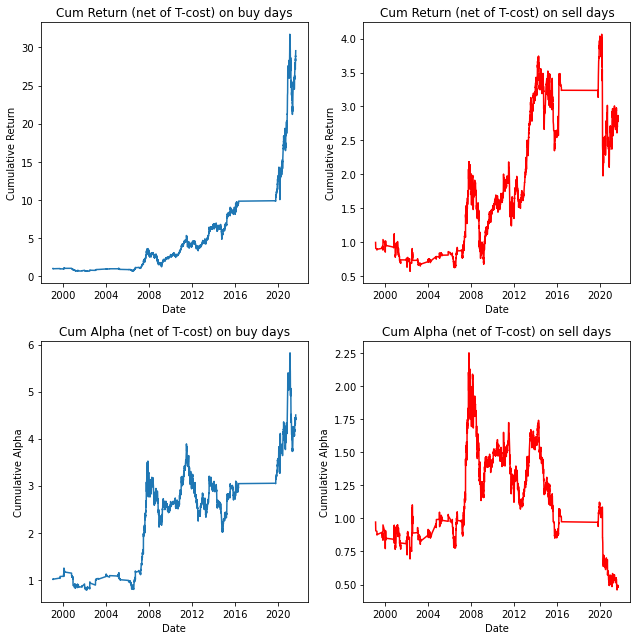

In [43]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.573
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000125
Time:                        20:40:29   Log-Likelihood:                 7672.1
No. Observations:                3237   AIC:                        -1.533e+04
Df Residuals:                    3230   BIC: 

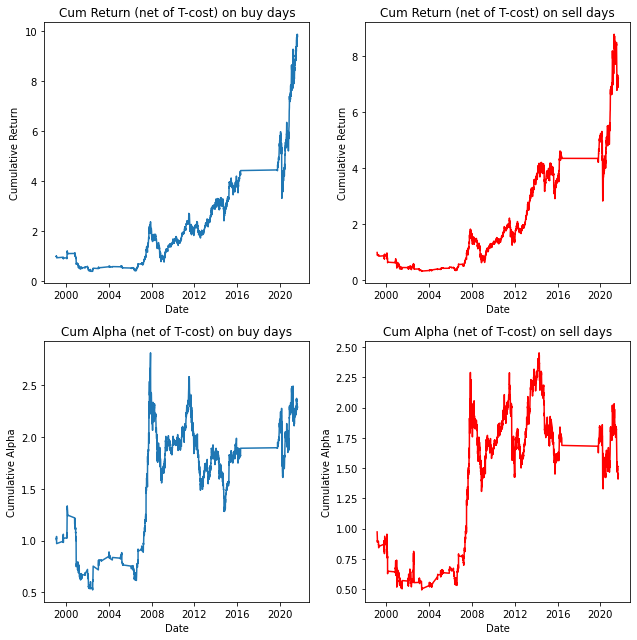

In [44]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.887
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000716
Time:                        20:40:50   Log-Likelihood:                 8011.3
No. Observations:                3362   AIC:                        -1.601e+04
Df Residuals:                    3355   BIC: 

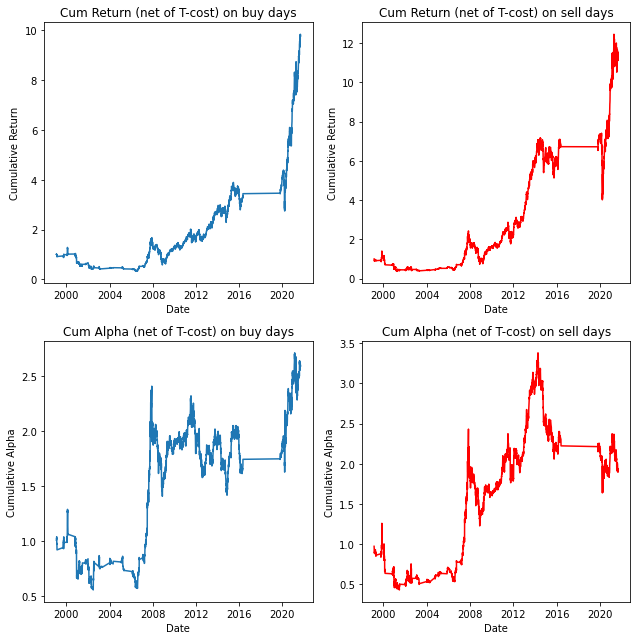

In [45]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.902
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00800
Time:                        20:41:09   Log-Likelihood:                 8222.5
No. Observations:                3446   AIC:                        -1.643e+04
Df Residuals:                    3439   BIC: 

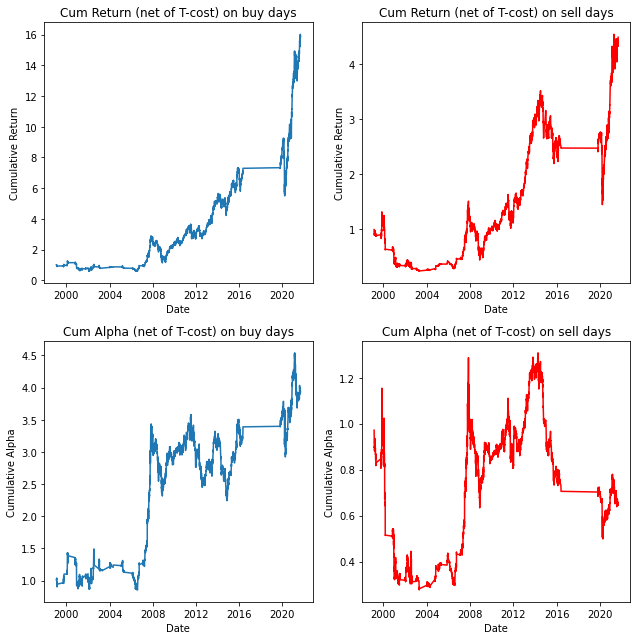

In [46]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpslowa1

In [47]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpslowa4'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpslowa4'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpslowa4'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  3971
Total number of Sells:  3657
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  24  problems for buying

There are  27  problems for selling
Total number of Buys:  3947
Total number of Sells:  3630

There are  69  problems for buying

There are  68  problems for selling
Total number of Buys:  33011
Total number of Sells:  27891

There are  65  problems for buying

There are  63  problems for selling
Total number of Buys:  26664
Total number of Sells:  22666

There are  51  problems for buying

There are  50  problems for selling
Total number of Buys:  19891
Total number of Sells:  17133

There are  38  problems for buying

There are  38  problems for selling
Total number of Buys:  12449
Total number of Sells:  10983

There are  0  problems for buying

There are  0  problems for selling
Total number of Buys:  3945
Total number of Sells:  3629



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.428
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0243
Time:                        20:42:19   Log-Likelihood:                 3987.9
No. Observations:                1786   AIC:                            -7962.
Df Residuals:                    1779   BIC: 

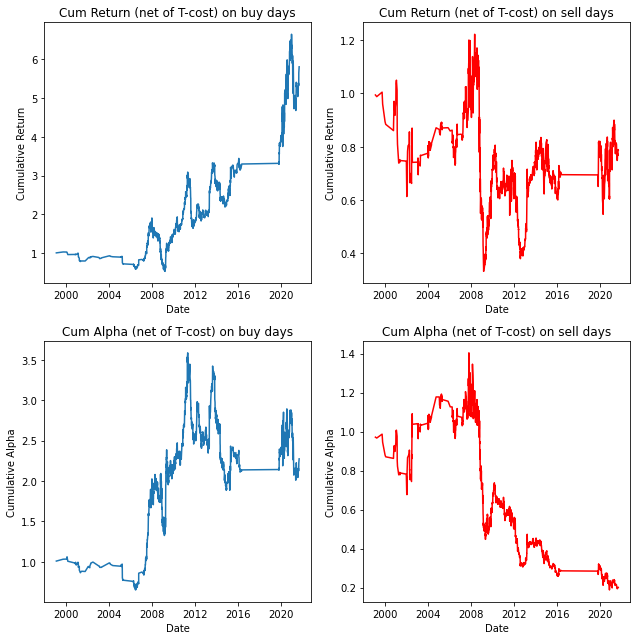

In [48]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.717
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0124
Time:                        20:42:33   Log-Likelihood:                 7042.9
No. Observations:                2991   AIC:                        -1.407e+04
Df Residuals:                    2984   BIC: 

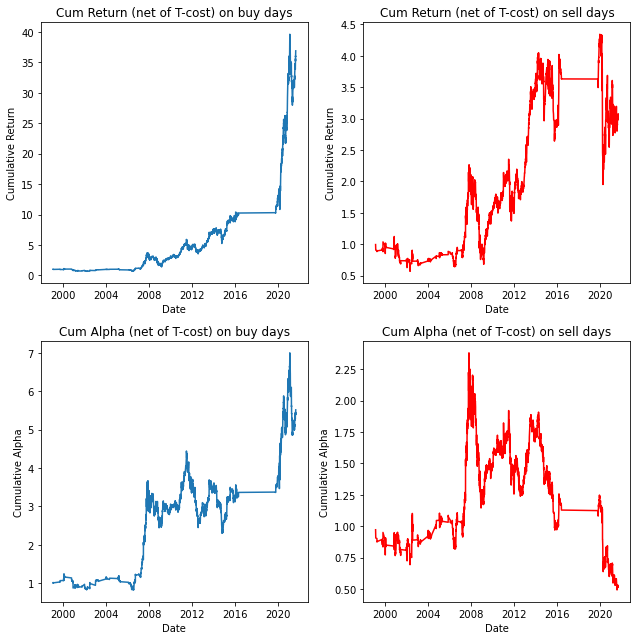

In [49]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.107
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000411
Time:                        20:42:47   Log-Likelihood:                 7693.9
No. Observations:                3233   AIC:                        -1.537e+04
Df Residuals:                    3226   BIC: 

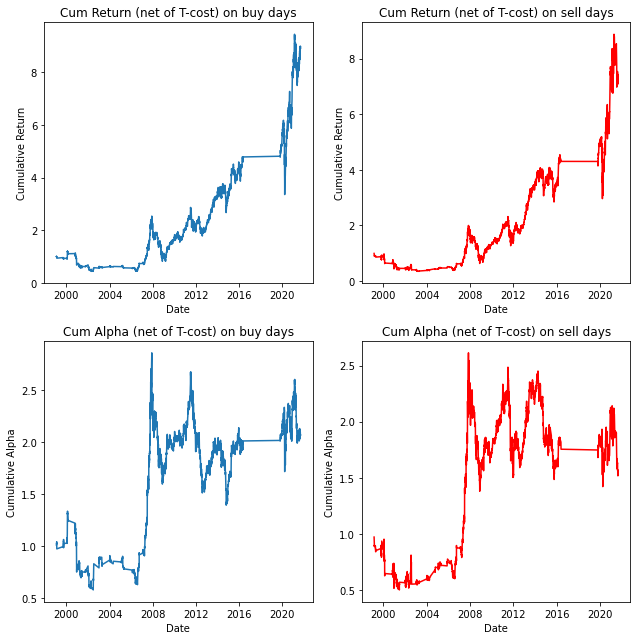

In [50]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.469
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00203
Time:                        20:43:01   Log-Likelihood:                 8023.7
No. Observations:                3363   AIC:                        -1.603e+04
Df Residuals:                    3356   BIC: 

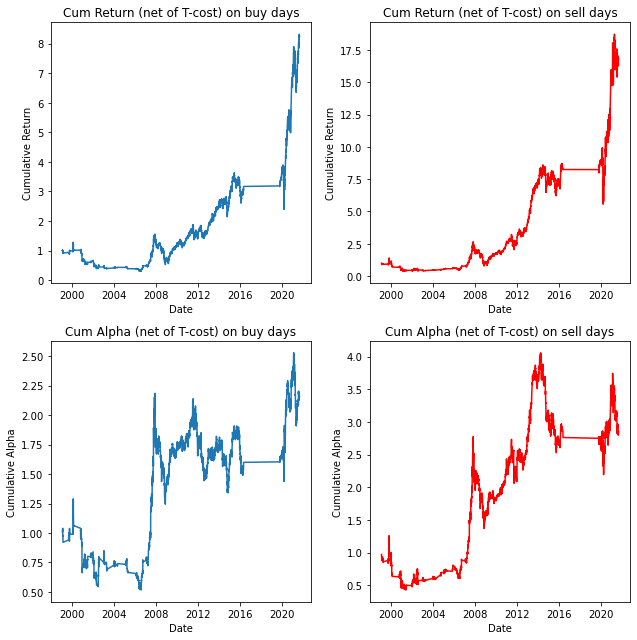

In [51]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.582
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0169
Time:                        20:43:16   Log-Likelihood:                 8226.6
No. Observations:                3447   AIC:                        -1.644e+04
Df Residuals:                    3440   BIC: 

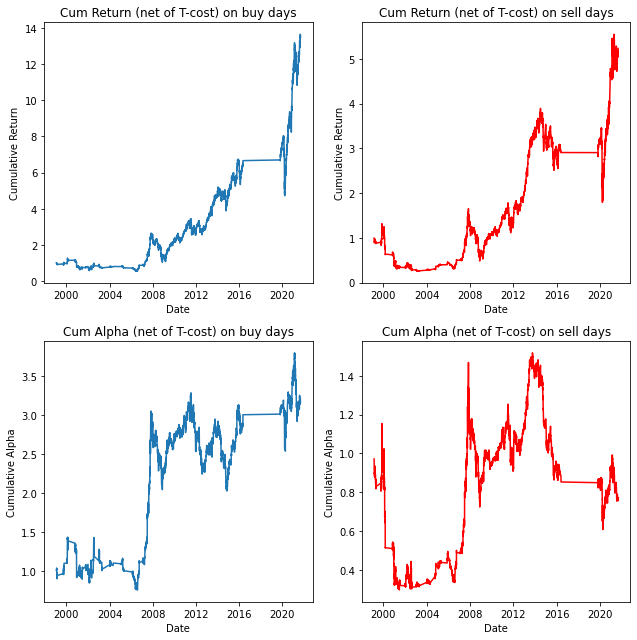

In [52]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH cfpshigha1 & cfpslowa1

In [53]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha4'].notna()].reset_index(drop=True).copy()
data = data[data['cfpslowa4'].notna()].reset_index(drop=True).copy()

data['midpoint_cfps_estimate'] = (data['cfpslowa4'] + data['cfpshigha4']) / 2

data = data[data['midpoint_cfps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  4087
Total number of Sells:  3763
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  31  problems for buying

There are  27  problems for selling
Total number of Buys:  4056
Total number of Sells:  3736

There are  70  problems for buying

There are  69  problems for selling
Total number of Buys:  34182
Total number of Sells:  29181

There are  66  problems for buying

There are  64  problems for selling
Total number of Buys:  27673
Total number of Sells:  23732

There are  53  problems for buying

There are  51  problems for selling
Total number of Buys:  20652
Total number of Sells:  17927

There are  40  problems for buying

There are  39  problems for selling
Total number of Buys:  12885
Total number of Sells:  11432

There are  0  problems for buying

There are  0  problems for selling
Total number of Buys:  4054
Total number of Sells:  3735



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.603
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0163
Time:                        20:44:13   Log-Likelihood:                 4030.6
No. Observations:                1805   AIC:                            -8047.
Df Residuals:                    1798   BIC: 

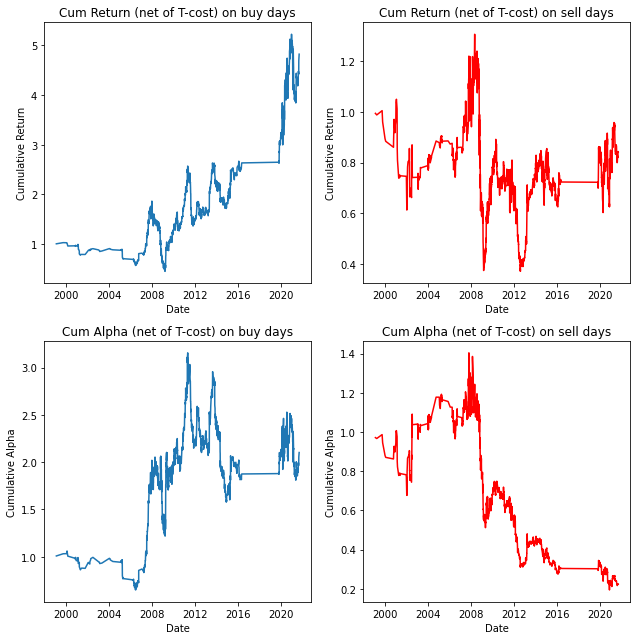

In [54]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.899
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00807
Time:                        20:44:31   Log-Likelihood:                 7078.5
No. Observations:                3004   AIC:                        -1.414e+04
Df Residuals:                    2997   BIC: 

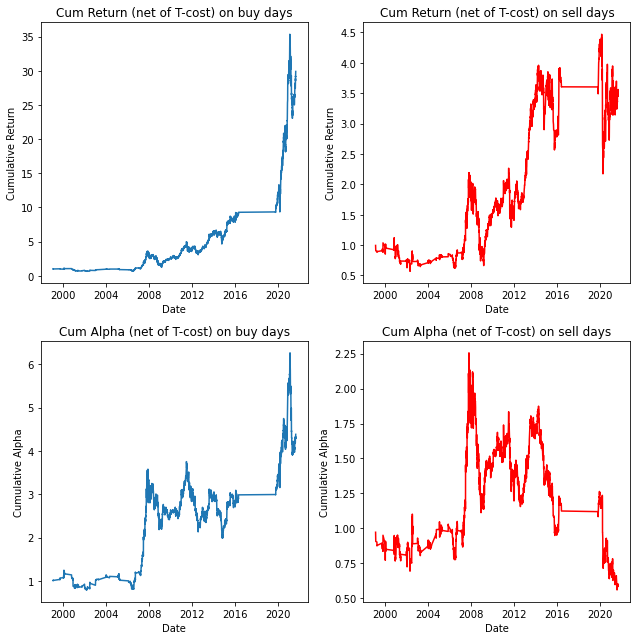

In [55]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.513
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000146
Time:                        20:44:50   Log-Likelihood:                 7706.1
No. Observations:                3239   AIC:                        -1.540e+04
Df Residuals:                    3232   BIC: 

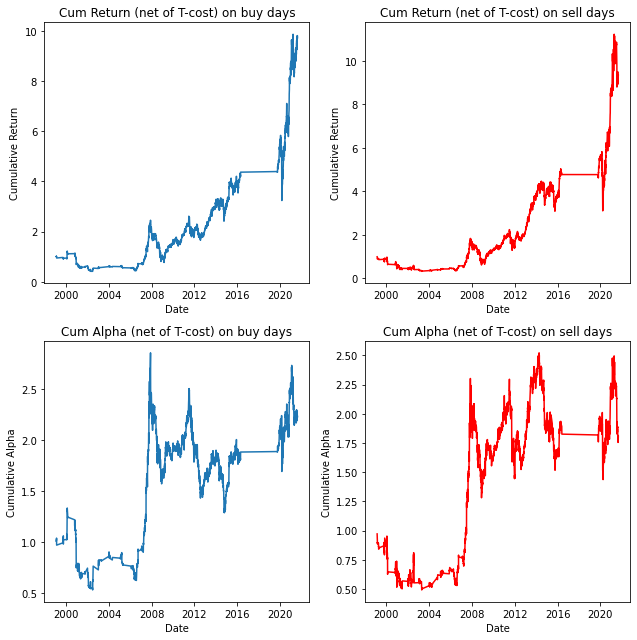

In [56]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.584
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00152
Time:                        20:45:05   Log-Likelihood:                 8036.5
No. Observations:                3364   AIC:                        -1.606e+04
Df Residuals:                    3357   BIC: 

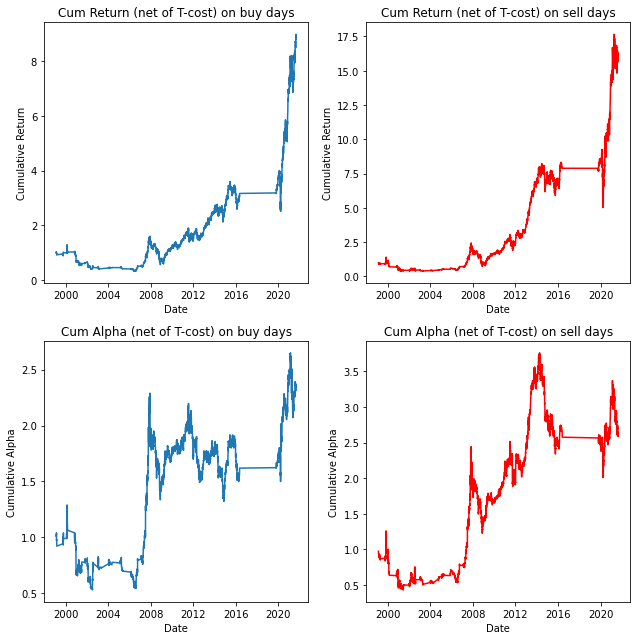

In [57]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.682
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0134
Time:                        20:45:20   Log-Likelihood:                 8242.7
No. Observations:                3448   AIC:                        -1.647e+04
Df Residuals:                    3441   BIC: 

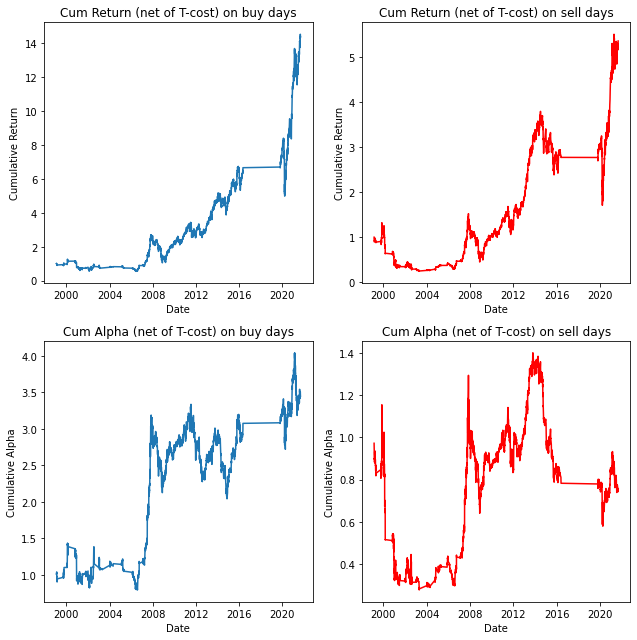

In [58]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)